## Setup

imports

In [1]:
import pandas as pd
import spacy
from tqdm import tqdm
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

connect to drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load dataset

In [4]:
dataset_path = 'drive/MyDrive/Colab Notebooks/nn/dataset/WikiQACorpus/WikiQACorpus/WikiQA-train.tsv' # drive path
#dataset_path = 'C:\\some_folder' # local path

In [5]:
df = pd.read_csv(dataset_path, delimiter='\t')

In [6]:
df.head()

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q1,how are glacier caves formed?,D1,Glacier cave,D1-0,A partly submerged glacier cave on Perito More...,0
1,Q1,how are glacier caves formed?,D1,Glacier cave,D1-1,The ice facade is approximately 60 m high,0
2,Q1,how are glacier caves formed?,D1,Glacier cave,D1-2,Ice formations in the Titlis glacier cave,0
3,Q1,how are glacier caves formed?,D1,Glacier cave,D1-3,A glacier cave is a cave formed within the ice...,1
4,Q1,how are glacier caves formed?,D1,Glacier cave,D1-4,"Glacier caves are often called ice caves , but...",0


## Analyze

### Counts

In [7]:
# number of pairs
len(df)

20355

In [8]:
# no of positive and negative examples 
df['Label'].value_counts()

0    19315
1     1040
Name: Label, dtype: int64

In [9]:
# find duplicate pairs of question - sentence => two duplicates found, can be ignored
df[['Question', 'Sentence']].value_counts()

Question                                                Sentence                                                                                                                                                                                                                                                                                
what are sanuks made of                                 right                                                                                                                                                                                                                                                                                       2
who starred in the drama emergency                      Emergency!                                                                                                                                                                                                                                                               

In [10]:
# no of unique questions
len(df['Question'].unique())

2118

In [11]:
# no of unique question ids => same as no of unique questions
len(df['QuestionID'].unique())

2118

In [12]:
# no of unique sentences
len(df['Sentence'].unique())

18816

In [13]:
# no of unique sentence ids
len(df['SentenceID'].unique())

18836

In [14]:
# no sentences with different id but same content
len(df['SentenceID'].unique()) - len(df['Sentence'].unique())

20

In [15]:
# show duplicate sentences
df['Sentence'].value_counts()

The defending Confederate army failed, leading to Lee's surrender to Grant at Appomattox Court House on April 9, 1865.                                                                                                                                                                                                                                                                        6
Eight remaining slave states continued to reject calls for secession.                                                                                                                                                                                                                                                                                                                         6
The Union marshaled the resources and manpower to attack the Confederacy from all directions, and could afford to fight battles of attrition through the Overland Campaign towards Richmond, the Confederate capital.                   

In [16]:
# show duplicate pairs of sentence and sentence id
df[['SentenceID', 'Sentence']].value_counts()

SentenceID  Sentence                                                                                                                                                                                                                                                                                          
D359-17     Lincoln issued the Emancipation Proclamation , which made ending slavery a war goal.                                                                                                                                                                                                                  6
D359-1      The war had its origin in the issue of slavery , especially the extension of slavery into the western territories.                                                                                                                                                                                    6
D359-5      Lincoln won, but before his inauguration on March 4, 1861, seven cott

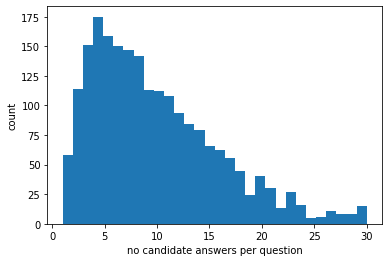

In [17]:
# show no of candidate answers per single question  
temp_df = pd.DataFrame(df['Question'].value_counts())
temp_df = temp_df.reset_index()
temp_df.columns = ['question', 'count']

plt.hist(temp_df['count'], bins=30)
plt.xlabel('no candidate answers per question')
plt.ylabel('count')
plt.show()

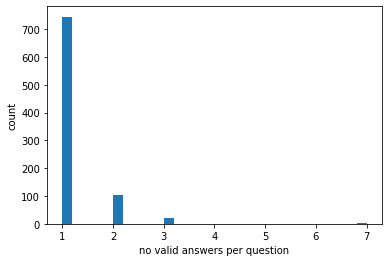

In [18]:
# show no of valid answers per single question  
temp_df = pd.DataFrame(df[df['Label'] == 1]['Question'].value_counts())
temp_df = temp_df.reset_index()
temp_df.columns = ['question', 'count']

plt.hist(temp_df['count'], bins=30)
plt.xlabel('no valid answers per question')
plt.ylabel('count')
plt.show()

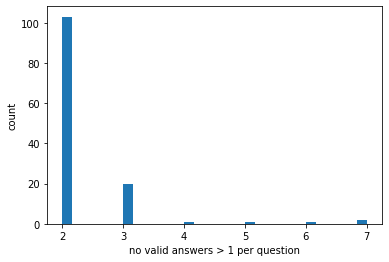

In [19]:
# show no of valid answers > 1 per single question  
temp_df = pd.DataFrame(df[df['Label'] == 1]['Question'].value_counts())
temp_df = temp_df.reset_index()
temp_df.columns = ['question', 'count']
temp_df = temp_df[temp_df['count'] > 1]

plt.hist(temp_df['count'], bins=30)
plt.xlabel('no valid answers > 1 per question')
plt.ylabel('count')
plt.show()

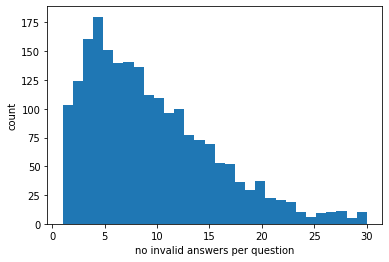

In [20]:
# show no of invalid answers per single question  
temp_df = pd.DataFrame(df[df['Label'] == 0]['Question'].value_counts())
temp_df = temp_df.reset_index()
temp_df.columns = ['question', 'count']

plt.hist(temp_df['count'], bins=30)
plt.xlabel('no invalid answers per question')
plt.ylabel('count')
plt.show()

Show questions with multiple answers

In [21]:
df['Label'] = pd.to_numeric(df['Label'])

In [22]:
df[['QuestionID', 'Label']].groupby('QuestionID').agg([np.sum]).sort_values(by=[("Label", "sum")], ascending=False).head()

,Label
,sum
QuestionID,
Q141,7
Q1075,7
Q1748,6
Q178,5
Q902,4


In [23]:
df[df['QuestionID'] == 'Q141'][['QuestionID', 'Question', 'Sentence', 'Label']]

,QuestionID,Question,Sentence,Label
1077,Q141,what composer used sound mass,"A texture may be arranged so as to, ""closely a...",0
1078,Q141,what composer used sound mass,In contrast to more traditional musical textur...,0
1079,Q141,what composer used sound mass,Developed from the modernist tone clusters and...,0
1080,Q141,what composer used sound mass,Techniques which may create or be used with so...,0
1081,Q141,what composer used sound mass,"Composers and works include Barbara Kolb , Pau...",1
1082,Q141,what composer used sound mass,"Beecroft ""blurs individual pitches in favor of...",0
1083,Q141,what composer used sound mass,(ibid),0
1084,Q141,what composer used sound mass,A very early example is the opening of Jean-Fé...,1
1085,Q141,what composer used sound mass,A later example is the third movement of Ruth ...,1
1086,Q141,what composer used sound mass,"The use of ""chords approaching timbres"" begins...",1


No questions with(out) correct answer

In [24]:
df_answer_counts = df[['QuestionID', 'Label']].groupby('QuestionID').agg({'Label': np.sum})

In [25]:
df_answer_counts.value_counts()

Label
0        1245
1         745
2         103
3          20
7           2
4           1
5           1
6           1
dtype: int64

### Text analysis

In [26]:
unique_questions = df['Question'].unique().tolist()
unique_answers = df['Sentence'].unique().tolist()

In [27]:
def is_token_valid(token):
    return not token.is_punct and \
           not token.is_stop and \
           not token.like_email and \
           not token.is_currency and \
           not token.is_quote and \
           not token.is_bracket and \
           not token.is_space and \
           not token.like_num and \
           not token.is_digit

In [28]:
def tokenize(texts):
    words_per_doc = []
    all_words = []

    for text in tqdm(texts):
        doc = nlp(text)
        tmp = []
        for token in doc:
            if is_token_valid(token):
                tmp.append(token.lemma_.lower())
                all_words.append(token.lemma_.lower())
        words_per_doc.append(tmp)

    return words_per_doc, all_words

In [29]:
words_per_doc_questions, all_words_questions = tokenize(unique_questions)
words_per_doc_answers, all_words_answers = tokenize(unique_answers)

100%|██████████| 18816/18816 [01:24<00:00, 223.93it/s]


In [30]:
def show_bar_plot(x, y):
    plt.bar(x, y)
    plt.xticks(rotation=90)
    plt.figure(figsize=(16, 10))
    plt.show()

In [31]:
def show_bar_plot_for_all_words(all_words, start=0, end=20):
    counter = Counter(all_words)

    items = sorted(list(counter.items()), key=lambda x: x[1], reverse=True)
    words = [item[0] for item in items]
    freqs = [item[1] for item in items]

    show_bar_plot(words[start:end], freqs[start:end])

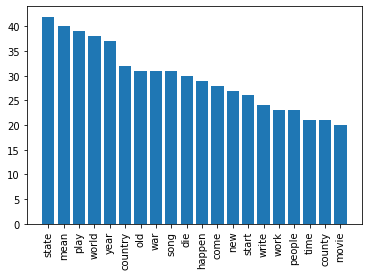

<Figure size 1152x720 with 0 Axes>

In [32]:
# most common words in questions
show_bar_plot_for_all_words(all_words_questions, start=0, end=20)

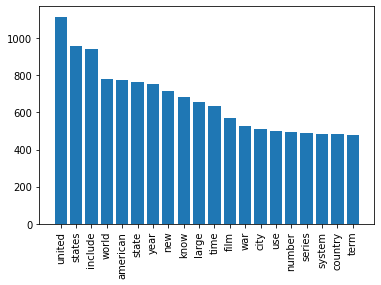

<Figure size 1152x720 with 0 Axes>

In [33]:
# most common words in answers
show_bar_plot_for_all_words(all_words_answers, start=0, end=20)

In [34]:
unique_questions_splitted = list(map(lambda x: x.lower().split(), unique_questions))

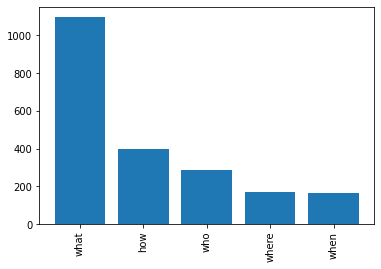

<Figure size 1152x720 with 0 Axes>

In [35]:
# show most frequent first word in questions => all of them are wh questions !
show_bar_plot_for_all_words([q_split[0] for q_split in unique_questions_splitted], start=0, end=20)

Text(0, 0.5, 'count')

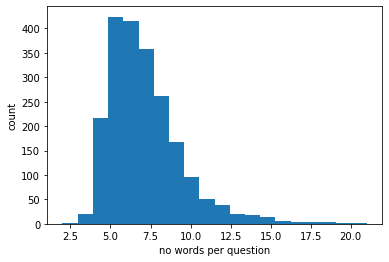

In [36]:
# show no words per question 
temp_list = [len(q) for q in unique_questions_splitted]
plt.hist(temp_list, bins=20)
plt.xlabel('no words per question')
plt.ylabel('count')

Text(0, 0.5, 'count')

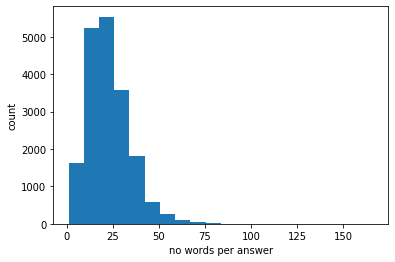

In [37]:
# show no words per answer 
unique_answers_splitted = list(map(lambda x: x.lower().split(), unique_answers))
temp_list = [len(q) for q in unique_answers_splitted]
plt.hist(temp_list, bins=20)
plt.xlabel('no words per answer')
plt.ylabel('count')

Text(0.5, 1.0, '< 100')

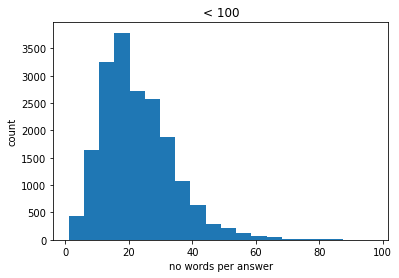

In [38]:
plt.hist([t for t in temp_list if t < 100], bins=20)
plt.xlabel('no words per answer')
plt.ylabel('count')
plt.title('< 100')

Text(0.5, 1.0, '> 100')

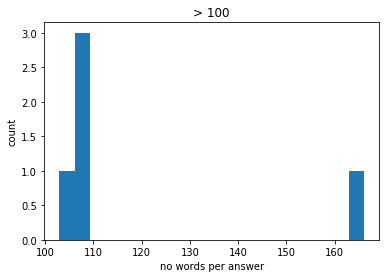

In [39]:
plt.hist([t for t in temp_list if t > 100], bins=20)
plt.xlabel('no words per answer')
plt.ylabel('count')
plt.title('> 100')

In [40]:
# show longest answers
for i, a in enumerate(unique_answers_splitted):
    if len(a) > 100:
        print('Len:', len(a), ', answer:', unique_answers[i])
        print('='*150)

Len: 103 , answer: It is defined in Article 2 of the Convention on the Prevention and Punishment of the Crime of Genocide (CPPCG) of 1948 as "any of the following acts committed with intent to destroy, in whole or in part, a national, ethnical , racial or religious group, as such: killing members of the group; causing serious bodily or mental harm to members of the group; deliberately inflicting on the groups conditions of life, calculated to bring about its physical destruction in whole or in part; imposing measures intended to prevent births within the group; [and] forcibly transferring children of the group to another group."
Len: 109 , answer: Although in the United Kingdom there is no strict legal or formal definition of who is or is not a member of the Royal Family, and different lists will include different people, those carrying the style Her or His Majesty (HM) , or Her or His Royal Highness (HRH) are always considered members, which usually results in the application of the t